In [1]:
import os 
import matplotlib.pyplot as plt

# import pyClimat models
from pyClimat.data import read_ECHAM_processed
from pyClimat.analysis import extract_var, compute_lterm_mean, compute_lterm_diff
from pyClimat.plot_utils import *
from pyClimat.plots import plot_annual_mean


In [2]:
# paths 
module_output_main_path = "/home/dboateng/Model_output_pst"
exp_name_aw100e100 = "a002_hpc-bw_e5w2.3_t159_PI_Alps_east_100_t159l31.6h"
exp_name_miow100e100_278ppm = "a011_hpc-bw_e5w2.3_t159_MIO_278ppm_CTL_t159l31.6h"

In [3]:
# read dataset
# for supplementary (same but for annual)
years= "1003_1017"
period = "1m"


# reading dataset
aw1e1_data, aw1e1_wiso = read_ECHAM_processed(main_path=module_output_main_path , exp_name= exp_name_aw100e100, years=years,
                                                  period=period)
miow1e1_data, miow1e1_wiso = read_ECHAM_processed(main_path=module_output_main_path , exp_name= exp_name_miow100e100_278ppm, years=years,
                                                  period=period)

In [4]:

#  extracting variables
 
#aw100e100
temp2_aw1e1 = extract_var(Dataset=aw1e1_data , varname="temp2", units="°C")
prec_aw1e1 = extract_var(Dataset= aw1e1_data , varname="prec", units="mm/month")
d18op_aw1e1 = extract_var(Dataset=aw1e1_data , varname="d18op", units="per mil", Dataset_wiso= aw1e1_wiso)
u10_aw1e1 = extract_var(Dataset=aw1e1_data , varname="u10")
v10_aw1e1 = extract_var(Dataset=aw1e1_data , varname="v10")

#miow100e100
temp2_miow1e1 = extract_var(Dataset=miow1e1_data , varname="temp2", units="°C")
prec_miow1e1 = extract_var(Dataset= miow1e1_data , varname="prec", units="mm/month")
d18op_miow1e1 = extract_var(Dataset=miow1e1_data , varname="d18op", units="per mil", Dataset_wiso= miow1e1_wiso)
u10_miow1e1 = extract_var(Dataset=miow1e1_data , varname="u10")
v10_miow1e1 = extract_var(Dataset=miow1e1_data , varname="v10")


In [5]:
# compute annual means and difference
# PI
temp2_aw1e1_alt = compute_lterm_mean(data=temp2_aw1e1, time="annual")
prec_aw1e1_alt = compute_lterm_mean(data=prec_aw1e1,  time="annual")
d18op_aw1e1_alt = compute_lterm_mean(data=d18op_aw1e1, time="annual")
u10_aw1e1_alt = compute_lterm_mean(data=u10_aw1e1, time="annual")
v10_aw1e1_alt = compute_lterm_mean(data=v10_aw1e1, time="annual")

#mio winds

u10_miow1e1_alt = compute_lterm_mean(data=u10_mio1e1, time="annual")
v10_miow1e1_alt = compute_lterm_mean(data=v10_mio1e1, time="annual")



Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed


In [6]:
# compute mean difference for Mio278 - PI
temp2_alt = compute_lterm_diff(data_control= temp2_aw1e1, data_main=temp2_miow1e1, time="annual")
prec_alt = compute_lterm_diff(data_control= prec_aw1e1, data_main=prec_miow1e1, time="annual")
d18op_alt = compute_lterm_diff(data_control= d18op_aw1e1, data_main=d18op_miow1e1, time="annual")

Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed
Define the time period for long-term mean or the annual mean is computed


The output would not be save on directory
The output would not be save on directory
The output would not be save on directory


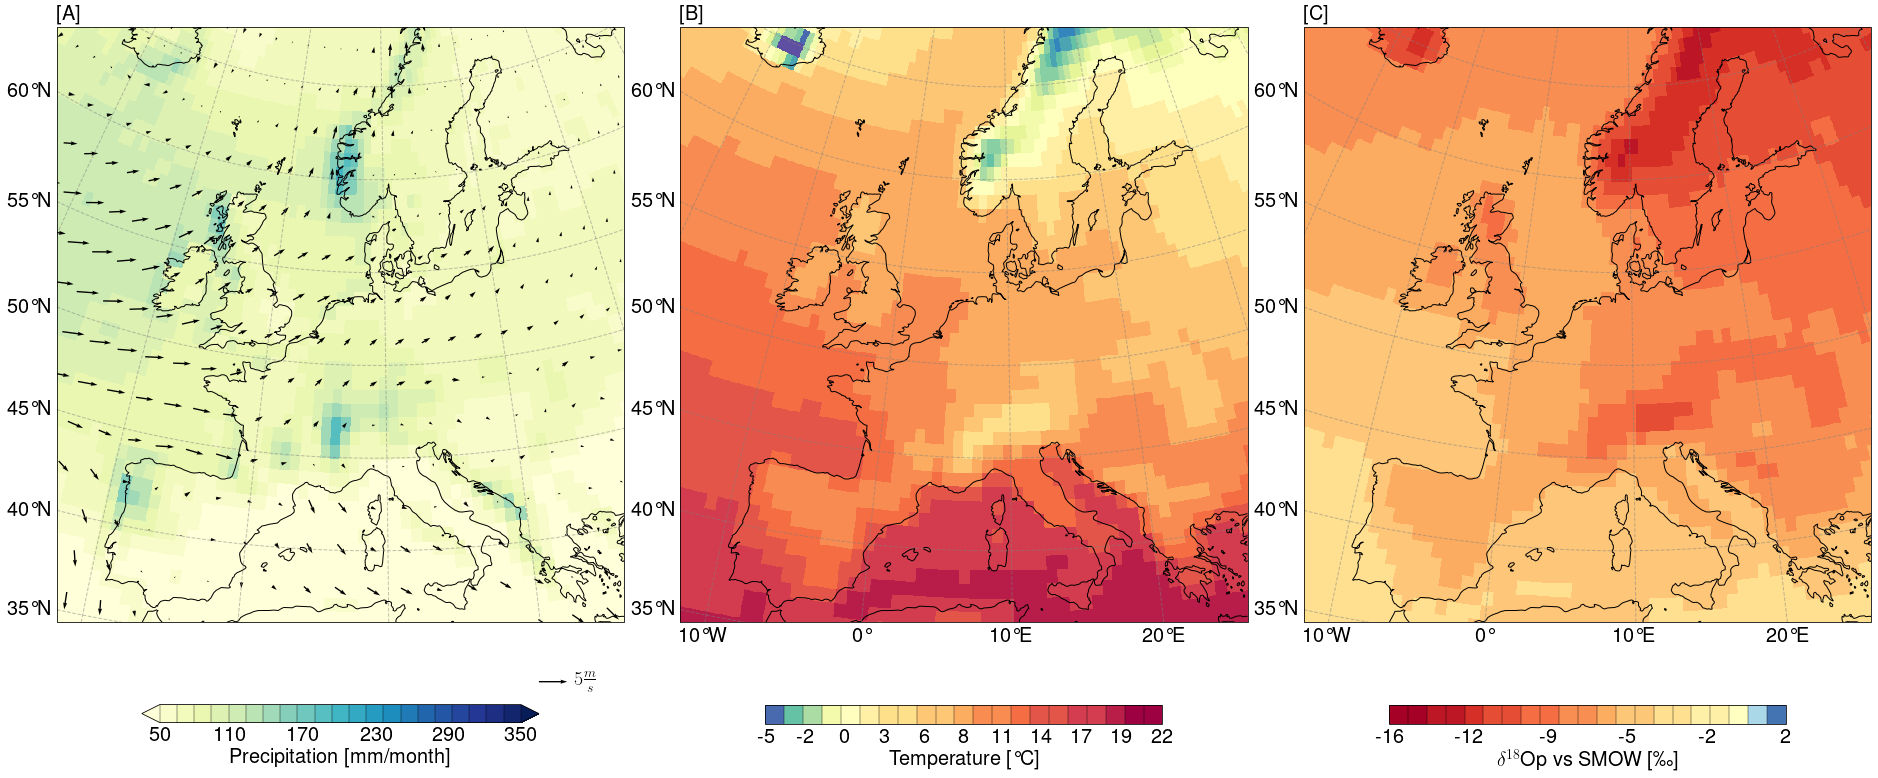

In [10]:
import cartopy.crs as ccrs
# plot PI
projection = ccrs.EuroPP()
apply_style(fontsize=22, style=None, linewidth=2) 
fig, (ax1,ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(28, 13), subplot_kw={"projection":  projection})


plot_annual_mean(ax=ax1, variable="Precipitation", data_alt=prec_aw1e1_alt, cmap=YlGnBu, units="mm/month", vmax=350, vmin=50, domain="Europe", 
                  levels=22, level_ticks=6, title="[A] PI", left_labels=True, bottom_labels=False, use_colorbar_default=True,
                  plot_projection=projection, plot_winds=True, data_u=u10_aw1e1_alt, data_v=v10_aw1e1_alt,)


plot_annual_mean(ax=ax2, variable="Temperature", data_alt=temp2_aw1e1_alt, cmap=Spectral_r, units="°C", vmax=22, vmin=-5, domain="Europe", 
                  levels=22, level_ticks=11, title="[B] PI", left_labels=True, bottom_labels=True, use_colorbar_default=True, 
                plot_projection=projection)

plot_annual_mean(ax=ax3, variable='$\delta^{18}$Op vs SMOW', data_alt=d18op_aw1e1_alt, cmap=RdYlBu, units="‰", vmax=2, vmin=-16, domain="Europe", 
                  levels=22, level_ticks=6, title="[C] PI", left_labels=True, bottom_labels=True, use_colorbar_default=True, 
                plot_projection=projection)


fig.canvas.draw()   # the only way to apply tight_layout to matplotlib and cartopy is to apply canvas first 
plt.tight_layout() 
plt.subplots_adjust(left=0.05, right=0.95, top=0.94, bottom=0.06)
plt.show()

NameError: name 'u10_miow1e1_alt' is not defined

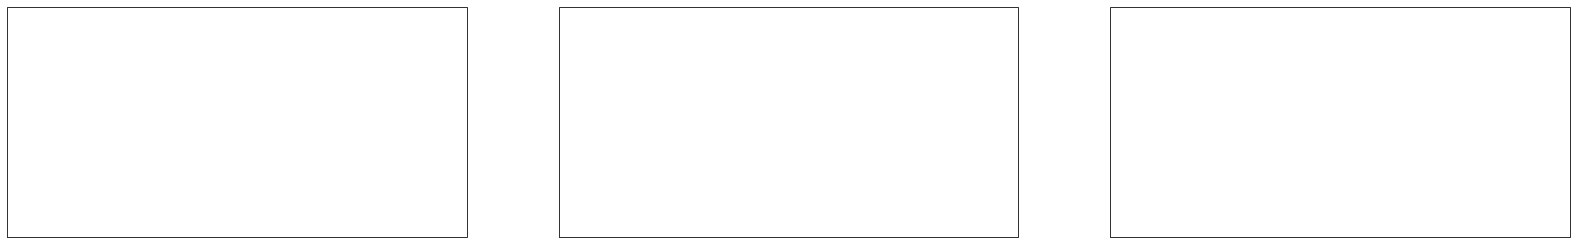

In [11]:
# plot difference
projection = ccrs.EuroPP()
apply_style(fontsize=22, style=None, linewidth=2) 
    
projection = ccrs.PlateCarree()
fig, (ax1,ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(28, 13), subplot_kw={"projection":  projection})


plot_annual_mean(ax=ax1, variable="Precipitation anomaly", data_alt=prec_alt, cmap=BrBG, units="mm/month", vmax=100, vmin=-100, domain="Europe", 
                  levels=22, level_ticks=6, title="[A] Mio278ppm - PI", left_labels=True, bottom_labels=False, use_colorbar_default=True,
                  plot_projection=projection, plot_winds=True, data_u=u10_miow1e1_alt, data_v=v10_miow1e1_alt,)


plot_annual_mean(ax=ax2, variable="Temperature anomaly", data_alt=temp2_alt, cmap=RdBu_r, units="°C", vmax=12, vmin=-12, domain="Europe", 
                  levels=22, level_ticks=11, title="[B] Mio278ppm - PI", left_labels=True, bottom_labels=True, use_colorbar_default=True, 
                plot_projection=projection)

plot_annual_mean(ax=ax3, variable='$\delta^{18}$Op anomaly vs SMOW', data_alt=d18op_alt, cmap=RdBu, units="‰", vmax=10, vmin=-10, domain="Europe", 
                  levels=22, level_ticks=6, title="[C] Mio278ppm - PI", left_labels=True, bottom_labels=True, use_colorbar_default=True, 
                plot_projection=projection)


fig.canvas.draw()   # the only way to apply tight_layout to matplotlib and cartopy is to apply canvas first 
plt.tight_layout() 
plt.subplots_adjust(left=0.05, right=0.95, top=0.94, bottom=0.06)
plt.show()